In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {
    1: [
    #    fixed       ppma        ppma-e      ppmb        ppmb-e      ppmc        ppmc-e         order
        [1953707514, 1953707562, 1953707562, 1953707642, 1953707642, 1953707592, 1953707592], # 0
        [1953707514, 1953297985, 1953297983, 1953298095, 1953298091, 1953298039, 1953298038], # 1
        [1953707514, 1950487075, 1950487072, 1950487244, 1950487236, 1950487181, 1950487179], # 2
        [1953707514, 1926168591, 1926168585, 1926168878, 1926168856, 1926168802, 1926168796], # 3
        [1953707514, 1919113209, 1919113186, 1919113710, 1919113660, 1919113609, 1919113590], # 4
    ],
    2: [
    #    fixed       ppma        ppma-e      ppmb        ppmb-e      ppmc        ppmc-e         order
        [1941341445, 1941341521, 1941341521, 1941341603, 1941341603, 1941341594, 1941341594], # 0
        [1941341445, 1914355025, 1914355005, 1914355349, 1914355305, 1914355317, 1914355297], # 1
        [1941341445, 1855928126, 1855928041, 1855929299, 1855929131, 1855929172, 1855929100], # 2
        [1941341445, 1803861888, 1803861553, 1803866150, 1803865524, 1803865619, 1803865331], # 3
        [1941341445, 1588715545, 1588714337, 1588730407, 1588728158, 1588728858, 1588727816], # 4
    ],
    4: [
    #    fixed       ppma        ppma-e      ppmb        ppmb-e      ppmc        ppmc-e         order
        [1879726307, 1879726566, 1879726566, 1879726904, 1879726904, 1879726878, 1879726878], # 0
        [1879726307, 1749533022, 1749532649, 1749537517, 1749536747, 1749536984, 1749536628], # 1
        [1879726307, 1121449266, 1121445811, 1121485009, 1121477865, 1121482109, 1121478814], # 2
        [1879726307,  666727138,  666708006,  666910675,  666872531,  666798575,  666780264], # 3
        [1879726307,  569877293,  569676661,  570536938,  570144616,  570081077,  569891422], # 4
    ],
    8: [
    #    fixed       ppma        ppma-e      ppmb        ppmb-e      ppmc        ppmc-e         order
        [1701386035, 1701390167, 1701390167, 1701393493, 1701393493, 1701393134, 1701393134], # 0
        [1701386035,  694787101,  694783952,  694837354,  694830843,  694805826,  694802708], # 1
        [1701386035,  552521866,  551791393,  552727923,  551280021,  551913052,  551188782], # 2
        [1701386035,  549920297,  548422038,  549111398,  546623163,  547496391,  546083977], # 3
        [1701386035,  550227146,  548190384,  548751347,  545362627,  546184955,  544247839], # 4
    ],
    16: [
    #    fixed       ppma        ppma-e      ppmb        ppmb-e      ppmc        ppmc-e         order
        [1046727819, 1046781770, 1046781770, 1046789378, 1046789378, 1046779689, 1046779689], # 0
        [1046727819,  547438798,  547254463,  547438661,  547109118,  546091232,  545907195], # 1
        [1046727819,  550101280,  547959212,  550006874,  546424803,  546877419,  544822232], # 2
        [1046727819,  639203629,  621208566,  581806709,  553271049,  585086830,  567412005], # 3
    ],
    32: [
    #    fixed       ppma        ppma-e      ppmb        ppmb-e      ppmc        ppmc-e         order
        [ 543413700,  543652492,  543652492,  543703456,  543703456,  543595178,  543595178], # 0
        [ 543413700,  552314813,  548734959,  546738747,  540697975,  544635802,  541071477], # 1
        [ 543413700,  751533738,  734104834,  565161197,  538838306,  586307438,  569106628], # 2
    ],
}

In [3]:
datasize = 244409199 * 8

In [4]:
strides = [1, 2, 4, 8, 16, 32]

models = {
    'fixed':  0,
    'ppma':   1,
    'ppma-e': 2,
    'ppmb':   3,
    'ppmb-e': 4,
    'ppmc':   5,
    'ppmc-e': 6,
}

In [5]:
smallest_length = float('inf')

for stride in strides:
    outer_smallest_length = float('inf')

    for order in range(len(data[stride])):
        inner_smallest_length = float('inf')
        
        for model in models:
            if inner_smallest_length > data[stride][order][models[model]]:
                inner_smallest_length = data[stride][order][models[model]]
                inner_best_stride = stride
                inner_best_order = order
                inner_best_model = model
        
        print(f'\t\tstride={stride} and order={order}: model={inner_best_model}, lengths={inner_smallest_length}')

        if outer_smallest_length > inner_smallest_length:
            outer_smallest_length = inner_smallest_length
            outer_best_stride = inner_best_stride
            outer_best_order = inner_best_order
            outer_best_model = inner_best_model
    
    print(f'\tstride={stride} and order={outer_best_order}: model={outer_best_model}, lengths={outer_smallest_length}')

    if smallest_length > outer_smallest_length:
        smallest_length = outer_smallest_length
        best_stride = outer_best_stride
        best_order = outer_best_order
        best_model = outer_best_model

print(f'Best selection: stride={best_stride}, order={best_order}, model={best_model}, lengths={smallest_length}')

		stride=1 and order=0: model=fixed, lengths=1953707514
		stride=1 and order=1: model=ppma-e, lengths=1953297983
		stride=1 and order=2: model=ppma-e, lengths=1950487072
		stride=1 and order=3: model=ppma-e, lengths=1926168585
		stride=1 and order=4: model=ppma-e, lengths=1919113186
	stride=1 and order=4: model=ppma-e, lengths=1919113186
		stride=2 and order=0: model=fixed, lengths=1941341445
		stride=2 and order=1: model=ppma-e, lengths=1914355005
		stride=2 and order=2: model=ppma-e, lengths=1855928041
		stride=2 and order=3: model=ppma-e, lengths=1803861553
		stride=2 and order=4: model=ppma-e, lengths=1588714337
	stride=2 and order=4: model=ppma-e, lengths=1588714337
		stride=4 and order=0: model=fixed, lengths=1879726307
		stride=4 and order=1: model=ppma-e, lengths=1749532649
		stride=4 and order=2: model=ppma-e, lengths=1121445811
		stride=4 and order=3: model=ppma-e, lengths=666708006
		stride=4 and order=4: model=ppma-e, lengths=569676661
	stride=4 and order=4: model=ppma-e, l

In [6]:
print(f'Compression Ratio = {datasize / smallest_length}')

Compression Ratio = 3.6286833549654873


In [7]:
def get_ratios_order(model, order):
    return [datasize / data[stride][order][models[model]] for stride in strides if order < len(data[stride])]

In [8]:
def get_ratios_stride(model, stride):
    return [datasize / data[stride][order][models[model]] for order in range(len(data[stride]))]

In [9]:
def get_style(cfg):
    if cfg == 0:
        linestyle, marker = (0, (3, 3)), 'o'
    elif cfg == 1:
        linestyle, marker = (0, (1, 1)), '^'
    elif cfg == 2:
        linestyle, marker = (0, (1, 5)), 'v'
    elif cfg == 3:
        linestyle, marker = (0, (5, 5)), 's'
    elif cfg == 4:
        linestyle, marker = (0, (5, 3)), 'p'
    elif cfg == 5:
        linestyle, marker = (0, (3, 3, 1, 3)), 'D'
    elif cfg == 6:
        linestyle, marker = (0, (3, 4, 1, 2)), 'x'
    
    return linestyle, marker

In [10]:
def plot_line_order(model, order, label):
    if model == label:
        cfg = models[model]
    else:
        cfg = order

    linestyle, marker = get_style(cfg)
    
    if isinstance(label, int):
        label = 1 << label

    plt.plot(get_ratios_order(model, order), linestyle=linestyle, marker=marker, markerfacecolor='none', label=label)

In [11]:
def plot_line_stride(model, stride, label):
    if model == label:
        cfg = models[model]
    else:
        cfg = stride

    linestyle, marker = get_style(cfg)

    plt.plot(get_ratios_stride(model, stride), linestyle=linestyle, marker=marker, markerfacecolor='none', label=label)

In [12]:
def plot_with_order(order):
    for model in models.keys():
        plot_line_order(model, order, model)
    
    plt.xticks(range(len(strides)), [str(s) for s in strides])
    plt.title(f'Compression Ratio vs Symbol Length (order={order})')
    plt.xlabel('Symbol Length')
    plt.ylabel('Compression Ratio')
    plt.legend()
    plt.show()

In [13]:
def plot_with_stride(stride):
    for model in models.keys():
        plot_line_stride(model, stride, model)
    
    plt.xticks(range(5), range(5))
    plt.title(f'Compression Ratio vs Order (Symbol Length={stride})')
    plt.xlabel('Order')
    plt.ylabel('Compression Ratio')
    plt.legend()
    # plt.show()

In [14]:
def plot_with_model(model):
    for order in range(5):
        plot_line_order(model, order, order)

    plt.title(f'Compression Ratio vs Order (model={model})')
    plt.xticks(range(len(strides)), range(len(strides)))
    plt.xlabel('Order')
    plt.ylabel('Compression Ratio')
    plt.legend()
    plt.show()

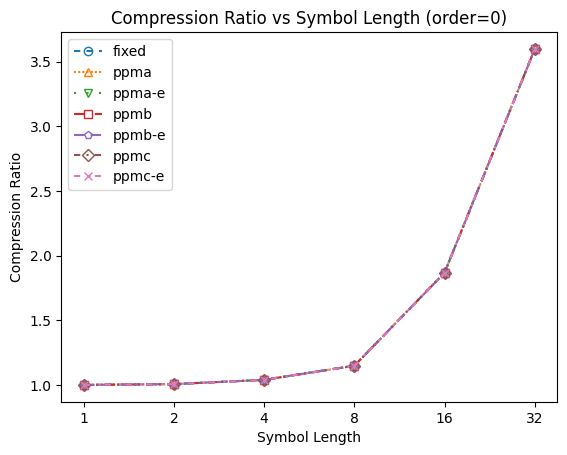

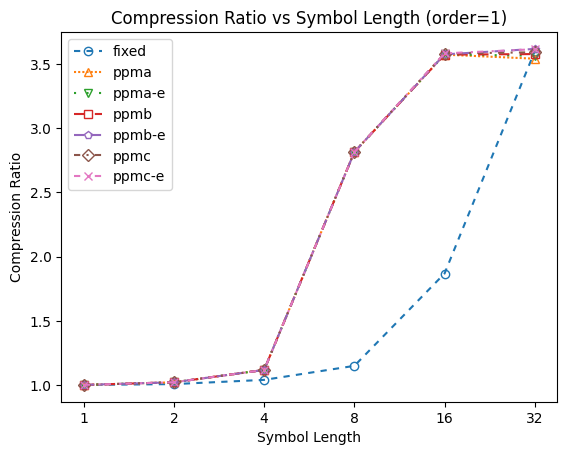

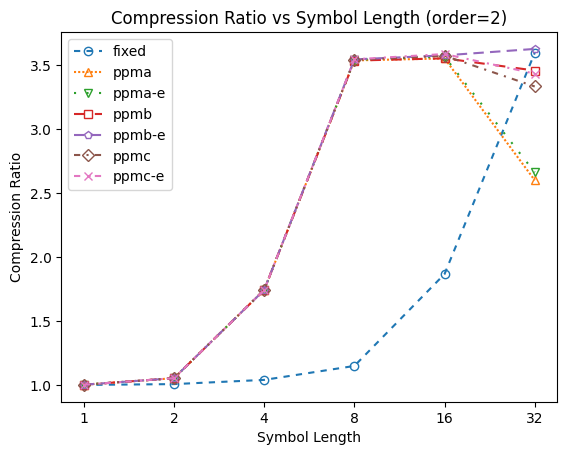

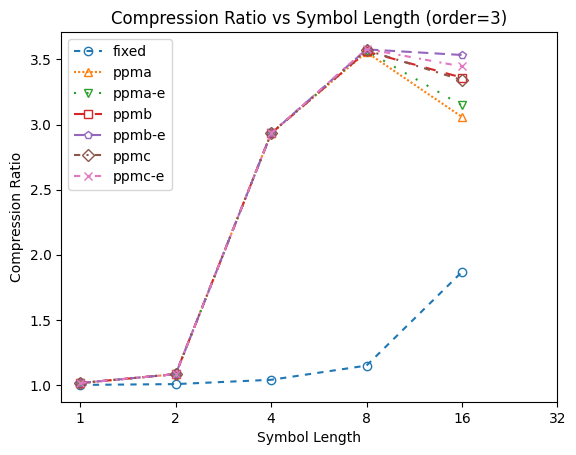

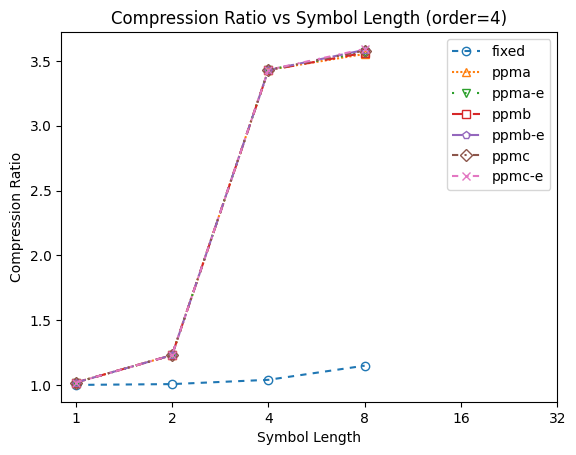

In [15]:
for i in range(5):
    plot_with_order(i)

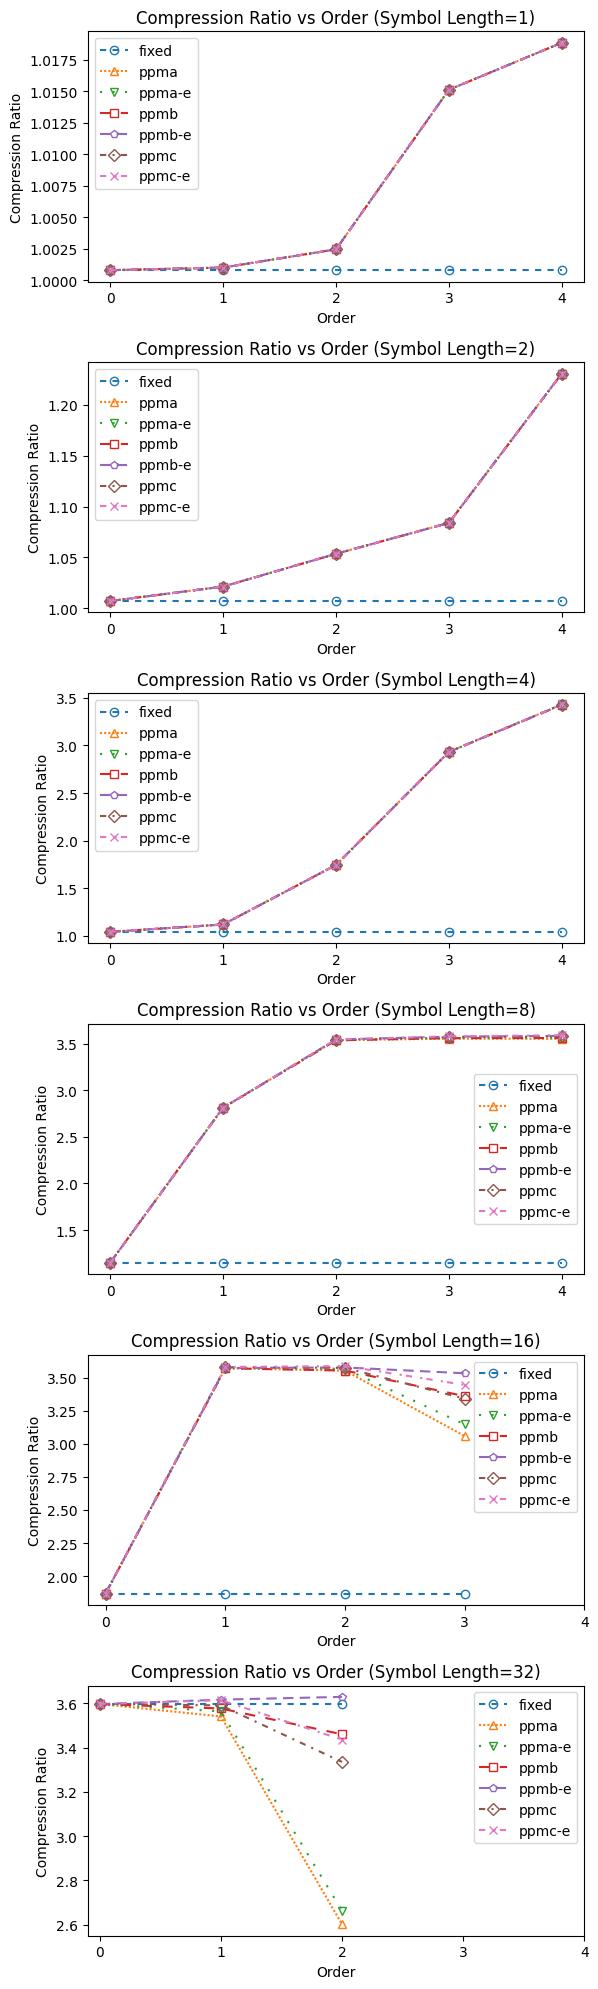

In [16]:
plt.figure(figsize=(6, 20))

for i in range(6):
    plt.subplot(6, 1, i+1)
    plot_with_stride(1 << i)
plt.tight_layout()
plt.show()

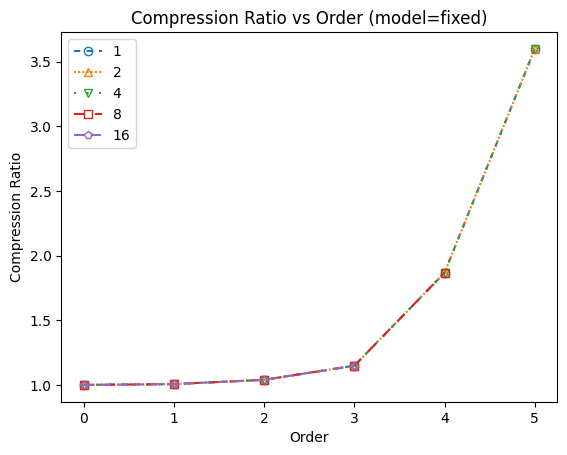

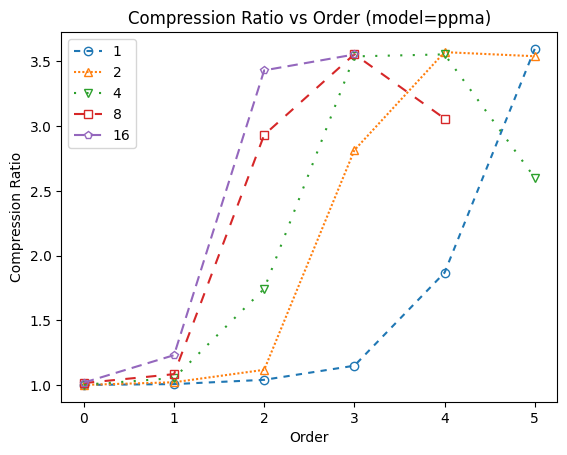

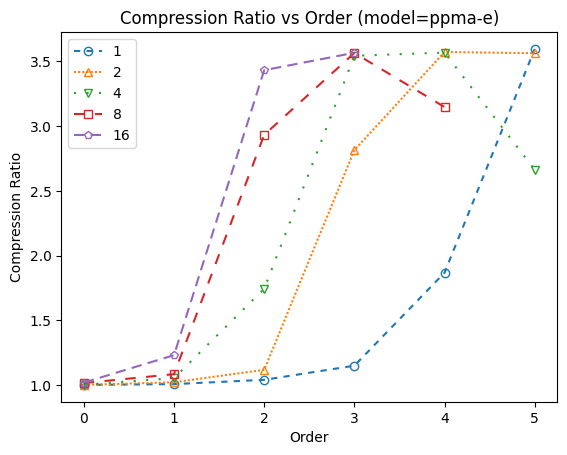

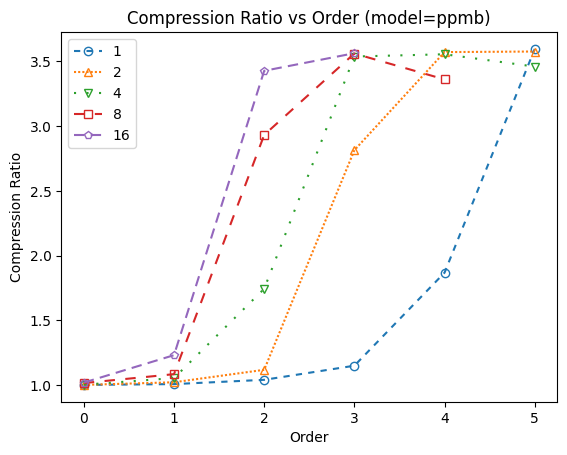

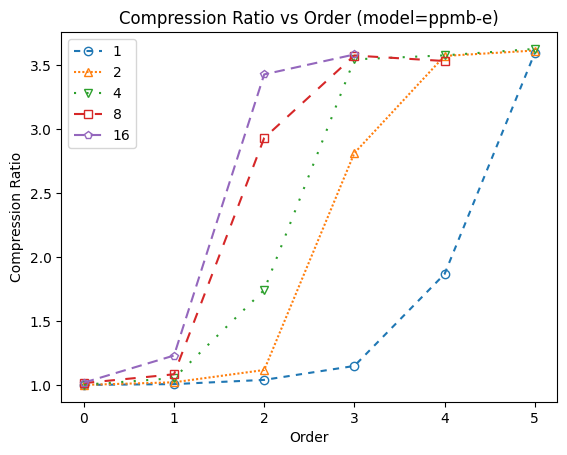

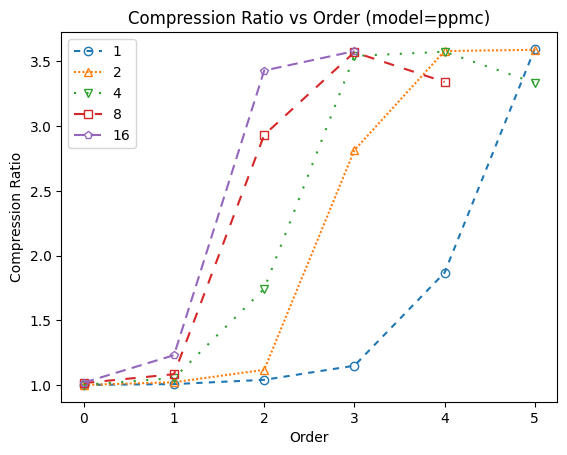

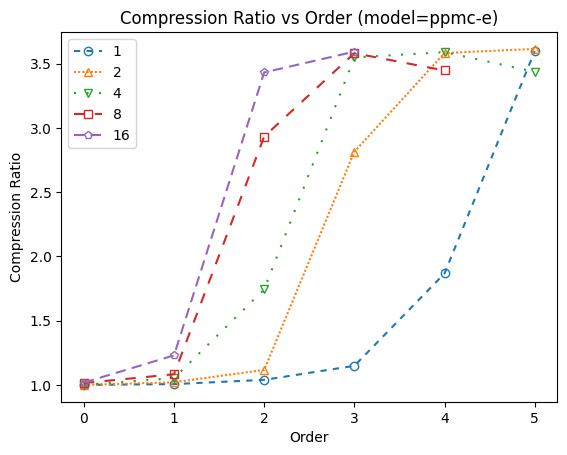

In [17]:
for i in models.keys():
    plot_with_model(i)